Today medical has converted into a business, doctors are charging more than enough from everyone and sufferers are the poor, so this is the data where there are
several Dr's and we can predict there fees according to there qualification and experience. 
And the data type is continuous we will be using linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
dr=pd.read_csv('Dr_consulting.csv')
dr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
dr.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [4]:
dr.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

The rating parameter may be important for us to determine the fees, but in 5961 rows 3302 rows are missing so it will be of no use to fill all these values on assumptions,
its better to eliminate this column and even miscellaneous info.

In [5]:
dc=dr.drop(['Rating','Miscellaneous_Info'], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dc['Qualification']=le.fit_transform(dc['Qualification'])
dc['Place']=le.fit_transform(dc['Place'].astype(str))
dc['Profile']=le.fit_transform(dc['Profile'])
dc['Experience']=le.fit_transform(dc['Experience'])

In [7]:
dc.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
Fees             0
dtype: int64

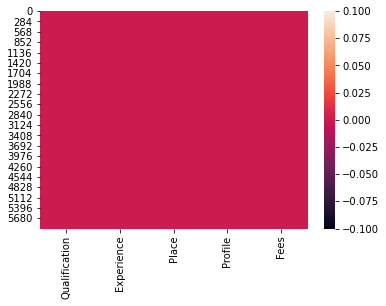

In [8]:
sns.heatmap(dc.isnull())

In [9]:
dc.describe()

,Qualification,Experience,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,417.089918,2.441872,307.944640
std,413.842446,20.937163,259.983793,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,412.000000,2.000000,300.000000
75%,943.000000,36.000000,632.000000,4.000000,500.000000
max,1419.000000,63.000000,877.000000,5.000000,950.000000


In [10]:
dc.corr()

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.003325,0.006321,0.393123,0.263214
Experience,0.003325,1.000000,-0.009908,-0.032711,-0.048529
Place,0.006321,-0.009908,1.000000,0.016631,-0.063510
Profile,0.393123,-0.032711,0.016631,1.000000,0.145226
Fees,0.263214,-0.048529,-0.063510,0.145226,1.000000


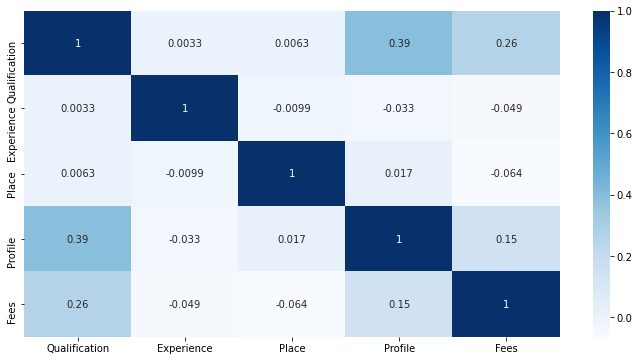

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(dc.corr(), cmap='Blues', annot=True)

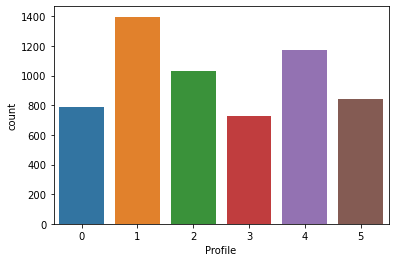

In [12]:
sns.countplot(dc['Profile'])

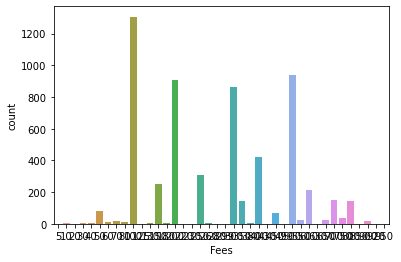

In [13]:
sns.countplot(dc['Fees'])

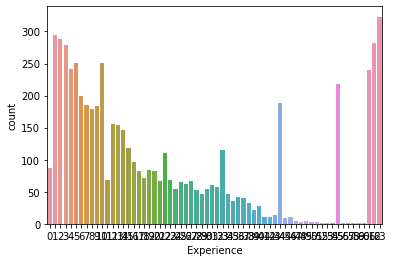

In [14]:
sns.countplot(dc['Experience'])

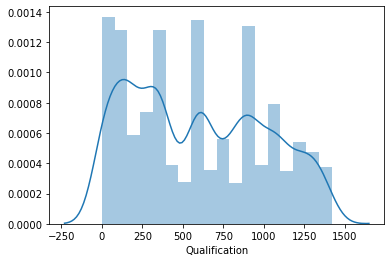

In [15]:
sns.distplot(dc['Qualification'])

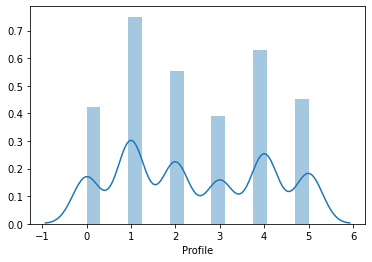

In [16]:
sns.distplot(dc['Profile'])

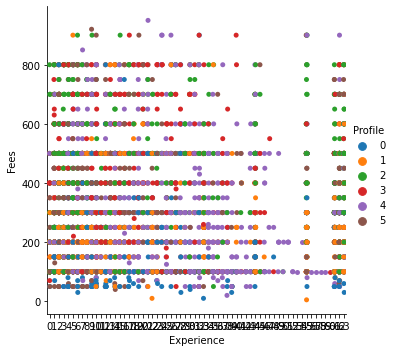

In [17]:
sns.catplot(x='Experience', y='Fees', hue='Profile', data=dc)

{'whiskers': [<matplotlib.lines.Line2D at 0xc43d910>,
 'caps': [<matplotlib.lines.Line2D at 0xc43dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc43d5b0>],
 'medians': [<matplotlib.lines.Line2D at 0xd4176d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd4179d0>],
 'means': []}

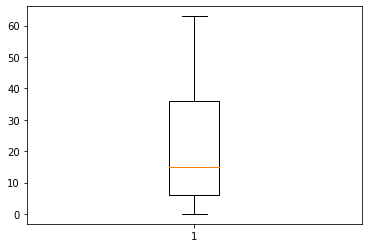

In [18]:
plt.boxplot(x='Experience', data=dc)

{'whiskers': [<matplotlib.lines.Line2D at 0xd470310>,
 'caps': [<matplotlib.lines.Line2D at 0xd4709d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd460f70>],
 'medians': [<matplotlib.lines.Line2D at 0xd4780d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd4783d0>],
 'means': []}

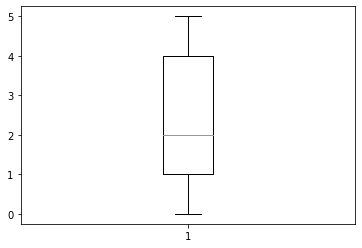

In [19]:
plt.boxplot(x='Profile', data=dc)

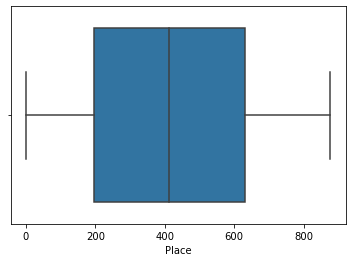

In [20]:
sns.boxplot(x='Place', data=dc)

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(dc))
ds=dc[(z<3).all(axis=1)]

In [22]:
ds.skew()

Qualification    0.242035
Experience       0.825063
Place            0.117122
Profile          0.111080
Fees             0.714016
dtype: float64

(array([1639., 1022.,  668.,  528.,  342.,  334.,  303.,   35.,  222.,
         848.]),
 array([ 0. ,  6.3, 12.6, 18.9, 25.2, 31.5, 37.8, 44.1, 50.4, 56.7, 63. ]),
 <a list of 10 Patch objects>)

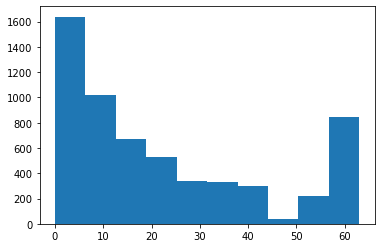

In [23]:
plt.hist(ds['Experience'])

(array([ 132., 1562., 1215.,  868.,  569., 1005.,   22.,  237.,  187.,
         144.]),
 array([  5. ,  89.5, 174. , 258.5, 343. , 427.5, 512. , 596.5, 681. ,
        765.5, 850. ]),
 <a list of 10 Patch objects>)

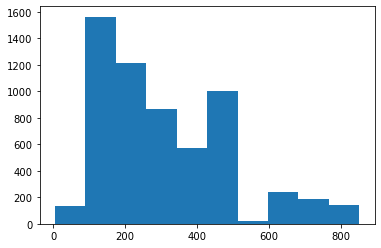

In [24]:
plt.hist(ds['Fees'])

(array([1225.,  534.,  836.,  210.,  769.,  370.,  697.,  572.,  370.,
         358.]),
 array([   0. ,  141.9,  283.8,  425.7,  567.6,  709.5,  851.4,  993.3,
        1135.2, 1277.1, 1419. ]),
 <a list of 10 Patch objects>)

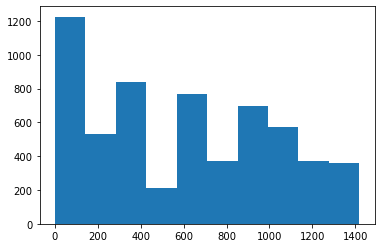

In [25]:
plt.hist(ds['Qualification'])

In [26]:
x=ds.iloc[:,0:-1]
y=ds.iloc[:,-1]

In [27]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 43 to the r2 Score is 0.09604734741158139


In [32]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lr,x,y,scoring='r2', cv=5).mean()
cross_val_scr

0.07584270166153093

We tried to get better score by dropping rating column as it had null values greater than 50%, but we got very less score.The score is too less so we try to add the column of rating again and check.

In [33]:
dr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [34]:
df=dr.drop(['Miscellaneous_Info'], axis=1)

In [35]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [39]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Place']=df['Place'].fillna(df['Place'].mode()[0])

In [41]:
df.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

In [40]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Qualification']=le.fit_transform(df['Qualification'])
df['Place']=le.fit_transform(df['Place'])
df['Profile']=le.fit_transform(df['Profile'])
df['Experience']=le.fit_transform(df['Experience'])
df['Rating']=le.fit_transform(df['Rating'])

In [43]:
df.dtypes

Qualification    int32
Experience       int32
Rating           int32
Place            int32
Profile          int32
Fees             int64
dtype: object

In [44]:
df.skew()

Qualification    0.239720
Experience       0.823531
Rating           0.817666
Place            0.124862
Profile          0.108803
Fees             0.751870
dtype: float64

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
cs=df[(z<3).all(axis=1)]

In [48]:
x=ds.iloc[:,0:-1]
y=ds.iloc[:,-1]

In [49]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 43 to the r2 Score is 0.09604734741158139


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [53]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.19783961438351433


In [56]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_y=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)

r2 score 0.1652971041537593


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.0758431505450898
{'alpha': 0.1}
0.07584340777022806


After applying all the algorithms and other ways, scorew seems to be still less so.
we are selecting the one which has better score than other comparitively,

In [58]:
df1=pd.DataFrame(pred_y)
df1.to_csv('gbr_prediction.csv')

In [59]:
import joblib
joblib.dump(gbr,'gbr_Dr_Consultation.pkl')

['gbr_Dr_Consultation.pkl']